In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ICML Plotting Set Up

In [3]:
plt.rcParams.update({
    "font.family": "serif",        
    "font.serif": ["Times New Roman", "DejaVu Serif"], 
    "text.usetex": False,          
    "pdf.fonttype": 42,            
    "ps.fonttype": 42,
    "axes.labelsize": 9,          
    "font.size": 9,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,          
    "ytick.labelsize": 8,
    "axes.grid": True,
    "grid.alpha": 0.3,             
    "axes.spines.top": False,      
    "axes.spines.right": False,
})

# Education Level Analysis

Plot saved as education_level_plot.pdf


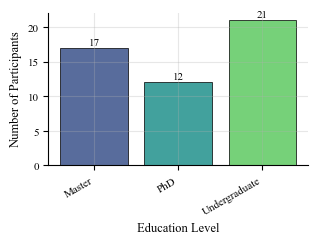

In [23]:
file_path = 'Human Subject Study (Responses).csv'

try:
    df = pd.read_csv(file_path, encoding='utf-8-sig')
except:
    df = pd.read_csv(file_path, encoding='gbk')

df.columns = df.columns.str.strip()
edu_col = [c for c in df.columns if 'Education' in c][0]
edu_counts = df[edu_col].value_counts().sort_index() 


fig, ax = plt.subplots(figsize=(3.25, 2.5)) 

colors = sns.color_palette("viridis", len(edu_counts))
bars = ax.bar(edu_counts.index, edu_counts.values, 
              color=colors, edgecolor='black', linewidth=0.6, alpha=0.85)

for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, 
            int(yval), ha='center', va='bottom', fontsize=8)

ax.set_xlabel('Education Level')
ax.set_ylabel('Number of Participants')

plt.xticks(rotation=30, ha='right')

plt.tight_layout()

plt.savefig('education_level_plot.pdf', bbox_inches='tight', dpi=600)

print("Plot saved as education_level_plot.pdf")

# RL Background Analysis

Plot saved as RL_background_plot.pdf


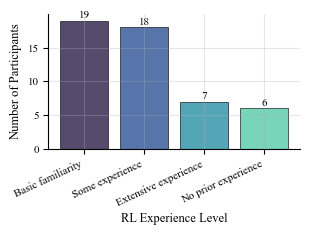

In [24]:
file_path = 'Human Subject Study (Responses).csv'
try:
    df = pd.read_csv(file_path, encoding='utf-8-sig')
except:
    df = pd.read_csv(file_path, encoding='gbk')

df.columns = df.columns.str.strip()
rl_col = 'Background in Reinforcement Learning (RL)'
if rl_col not in df.columns:
    rl_col = [c for c in df.columns if 'RL' in c or 'Reinforcement' in c][0]

edu_counts = df[rl_col].value_counts()

fig, ax = plt.subplots(figsize=(3.25, 2.4)) 

colors = sns.color_palette("mako", len(edu_counts))
bars = ax.bar(edu_counts.index, edu_counts.values, 
              color=colors, edgecolor='black', linewidth=0.5, alpha=0.85)

for bar in bars:
    yval = bar.get_height()
    if yval > 0:
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, 
                f'{int(yval)}', ha='center', va='bottom', fontsize=8)

ax.set_xlabel('RL Experience Level')
ax.set_ylabel('Number of Participants')

plt.xticks(rotation=25, ha='right')

plt.tight_layout()

plt.savefig('RL_background_plot.pdf', bbox_inches='tight', dpi=600)

print("Plot saved as RL_background_plot.pdf")

# Q1 Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2992\1338799442.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set3')(range(len(q1_counts)))


Correctness Rate: 88.00%


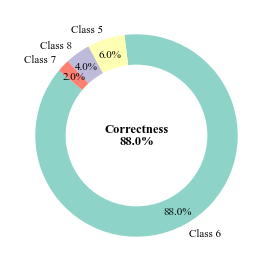

In [12]:
try:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='gbk')

q1_col = df.columns[4]
df[q1_col] = df[q1_col].str.strip()

q1_counts = df[q1_col].value_counts()
correct_answer = "Class 6"
total_responses = len(df)
correctness_rate = (df[q1_col] == correct_answer).sum() / total_responses * 100

fig, ax = plt.subplots(figsize=(3.25, 2.8))

colors = plt.cm.get_cmap('Set3')(range(len(q1_counts)))

wedges, texts, autotexts = ax.pie(
    q1_counts, 
    labels=q1_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    pctdistance=0.85, # Move percentages inside
    textprops={'fontsize': 8}
)

# Optional: Convert to Donut chart for a more modern look
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add correctness rate as a clean label instead of a box
ax.text(0, 0, f'Correctness\n{correctness_rate:.1f}%', 
        ha='center', va='center', fontsize=9, fontweight='bold')

# Remove internal title (use LaTeX \caption instead)
plt.tight_layout()

# Save as vector PDF
plt.savefig('q1_analysis.pdf', bbox_inches='tight', dpi=600)
# plt.show()

print(f"Correctness Rate: {correctness_rate:.2f}%")

Stats for Paper:
Avg: 21.45s, Median: 13.50s, Range: [5.9, 300.0]


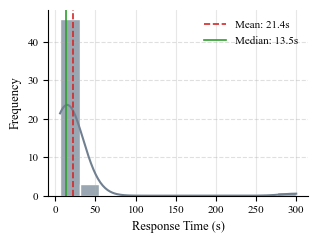

In [13]:
try:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='gbk')

q1_time_col = 'Q1 Estimated Time Cost (s)'
time_data = df[q1_time_col].dropna() 

mean_val = time_data.mean()
median_val = time_data.median()

fig, ax = plt.subplots(figsize=(3.25, 2.5))

sns.histplot(time_data, bins=12, kde=True, color='slategray', 
             edgecolor='white', alpha=0.7, ax=ax)

ax.axvline(mean_val, color='#d62728', linestyle='--', linewidth=1.2,
           label=f'Mean: {mean_val:.1f}s')
ax.axvline(median_val, color='#2ca02c', linestyle='-', linewidth=1.2,
           label=f'Median: {median_val:.1f}s')

ax.set_xlabel('Response Time (s)')
ax.set_ylabel('Frequency')
ax.legend(frameon=False) 

ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()

plt.savefig('q1_time_distribution.pdf', bbox_inches='tight', dpi=600)
# plt.show()

print(f"Stats for Paper:\nAvg: {mean_val:.2f}s, Median: {median_val:.2f}s, Range: [{time_data.min()}, {time_data.max()}]")

# Q2 Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2992\490048098.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set3')(range(len(q2_counts)))


Correctness Rate: 92.00%


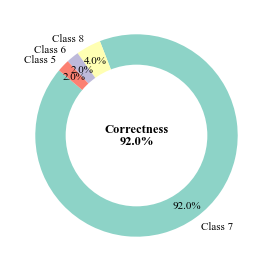

In [15]:
try:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='gbk')

q2_col = df.columns[5]
df[q2_col] = df[q2_col].str.strip()

q2_counts = df[q2_col].value_counts()
correct_answer = "Class 7"
total_responses = len(df)
correctness_rate = (df[q2_col] == correct_answer).sum() / total_responses * 100

fig, ax = plt.subplots(figsize=(3.25, 2.8))

colors = plt.cm.get_cmap('Set3')(range(len(q2_counts)))

wedges, texts, autotexts = ax.pie(
    q2_counts, 
    labels=q2_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    pctdistance=0.85, # Move percentages inside
    textprops={'fontsize': 8}
)

# Optional: Convert to Donut chart for a more modern look
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add correctness rate as a clean label instead of a box
ax.text(0, 0, f'Correctness\n{correctness_rate:.1f}%', 
        ha='center', va='center', fontsize=9, fontweight='bold')

# Remove internal title (use LaTeX \caption instead)
plt.tight_layout()

# Save as vector PDF
plt.savefig('q2_analysis.pdf', bbox_inches='tight', dpi=600)
# plt.show()

print(f"Correctness Rate: {correctness_rate:.2f}%")

Stats for Paper:
Avg: 15.98s, Median: 13.30s, Range: [2.0, 60.0]


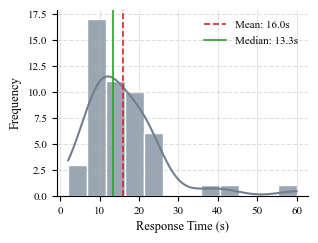

In [16]:
try:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='gbk')

q2_time_col = 'Q2 Estimated Time Cost (s)'
time_data = df[q2_time_col].dropna() 

mean_val = time_data.mean()
median_val = time_data.median()

fig, ax = plt.subplots(figsize=(3.25, 2.5))

sns.histplot(time_data, bins=12, kde=True, color='slategray', 
             edgecolor='white', alpha=0.7, ax=ax)

ax.axvline(mean_val, color='#d62728', linestyle='--', linewidth=1.2,
           label=f'Mean: {mean_val:.1f}s')
ax.axvline(median_val, color='#2ca02c', linestyle='-', linewidth=1.2,
           label=f'Median: {median_val:.1f}s')

ax.set_xlabel('Response Time (s)')
ax.set_ylabel('Frequency')
ax.legend(frameon=False) 

ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()

plt.savefig('q2_time_distribution.pdf', bbox_inches='tight', dpi=600)
# plt.show()

print(f"Stats for Paper:\nAvg: {mean_val:.2f}s, Median: {median_val:.2f}s, Range: [{time_data.min()}, {time_data.max()}]")

# Q3 Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2992\1312263222.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set3')(range(len(q3_counts)))


Correctness Rate: 88.00%


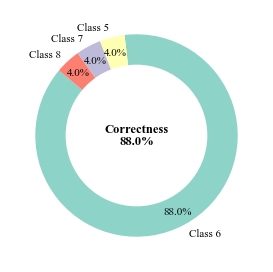

In [17]:
try:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='gbk')

q3_col = df.columns[6]
df[q3_col] = df[q3_col].str.strip()

q3_counts = df[q3_col].value_counts()
correct_answer = "Class 6"
total_responses = len(df)
correctness_rate = (df[q3_col] == correct_answer).sum() / total_responses * 100

fig, ax = plt.subplots(figsize=(3.25, 2.8))

colors = plt.cm.get_cmap('Set3')(range(len(q3_counts)))

wedges, texts, autotexts = ax.pie(
    q3_counts, 
    labels=q3_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    pctdistance=0.85, # Move percentages inside
    textprops={'fontsize': 8}
)

# Optional: Convert to Donut chart for a more modern look
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add correctness rate as a clean label instead of a box
ax.text(0, 0, f'Correctness\n{correctness_rate:.1f}%', 
        ha='center', va='center', fontsize=9, fontweight='bold')

# Remove internal title (use LaTeX \caption instead)
plt.tight_layout()

# Save as vector PDF
plt.savefig('q3_analysis.pdf', bbox_inches='tight', dpi=600)
# plt.show()

print(f"Correctness Rate: {correctness_rate:.2f}%")

Stats for Paper:
Avg: 15.51s, Median: 13.70s, Range: [1.0, 42.0]


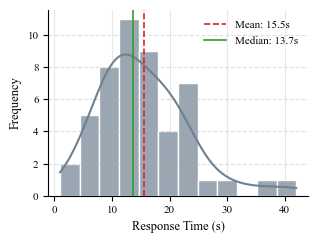

In [18]:
try:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='gbk')

q3_time_col = 'Q3 Estimated Time Cost (s)'
time_data = df[q3_time_col].dropna() 

mean_val = time_data.mean()
median_val = time_data.median()

fig, ax = plt.subplots(figsize=(3.25, 2.5))

sns.histplot(time_data, bins=12, kde=True, color='slategray', 
             edgecolor='white', alpha=0.7, ax=ax)

ax.axvline(mean_val, color='#d62728', linestyle='--', linewidth=1.2,
           label=f'Mean: {mean_val:.1f}s')
ax.axvline(median_val, color='#2ca02c', linestyle='-', linewidth=1.2,
           label=f'Median: {median_val:.1f}s')

ax.set_xlabel('Response Time (s)')
ax.set_ylabel('Frequency')
ax.legend(frameon=False) 

ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()

plt.savefig('q3_time_distribution.pdf', bbox_inches='tight', dpi=600)
# plt.show()

print(f"Stats for Paper:\nAvg: {mean_val:.2f}s, Median: {median_val:.2f}s, Range: [{time_data.min()}, {time_data.max()}]")

# Q4 Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2992\3027934714.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set3')(range(len(q4_counts)))


Correctness Rate: 84.00%


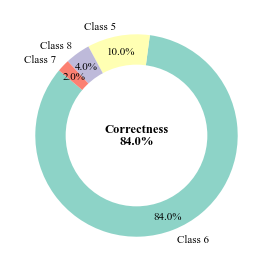

In [19]:
try:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='gbk')

q4_col = df.columns[7]
df[q4_col] = df[q4_col].str.strip()

q4_counts = df[q4_col].value_counts()
correct_answer = "Class 6"
total_responses = len(df)
correctness_rate = (df[q4_col] == correct_answer).sum() / total_responses * 100

fig, ax = plt.subplots(figsize=(3.25, 2.8))

colors = plt.cm.get_cmap('Set3')(range(len(q4_counts)))

wedges, texts, autotexts = ax.pie(
    q4_counts, 
    labels=q4_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors,
    pctdistance=0.85, # Move percentages inside
    textprops={'fontsize': 8}
)

# Optional: Convert to Donut chart for a more modern look
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add correctness rate as a clean label instead of a box
ax.text(0, 0, f'Correctness\n{correctness_rate:.1f}%', 
        ha='center', va='center', fontsize=9, fontweight='bold')

# Remove internal title (use LaTeX \caption instead)
plt.tight_layout()

# Save as vector PDF
plt.savefig('q4_analysis.pdf', bbox_inches='tight', dpi=600)
# plt.show()

print(f"Correctness Rate: {correctness_rate:.2f}%")

Stats for Paper:
Avg: 15.24s, Median: 13.45s, Range: [1.0, 46.0]


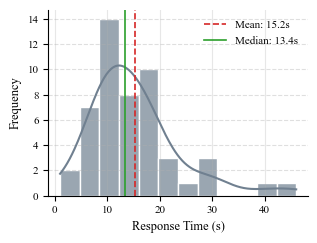

In [20]:
try:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='gbk')

q4_time_col = 'Q4 Estimated Time Cost (s)'
time_data = df[q4_time_col].dropna() 

mean_val = time_data.mean()
median_val = time_data.median()

fig, ax = plt.subplots(figsize=(3.25, 2.5))

sns.histplot(time_data, bins=12, kde=True, color='slategray', 
             edgecolor='white', alpha=0.7, ax=ax)

ax.axvline(mean_val, color='#d62728', linestyle='--', linewidth=1.2,
           label=f'Mean: {mean_val:.1f}s')
ax.axvline(median_val, color='#2ca02c', linestyle='-', linewidth=1.2,
           label=f'Median: {median_val:.1f}s')

ax.set_xlabel('Response Time (s)')
ax.set_ylabel('Frequency')
ax.legend(frameon=False) 

ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()

plt.savefig('q4_time_distribution.pdf', bbox_inches='tight', dpi=600)
# plt.show()

print(f"Stats for Paper:\nAvg: {mean_val:.2f}s, Median: {median_val:.2f}s, Range: [{time_data.min()}, {time_data.max()}]")

# Trust Rating Analysis

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2992\892645153.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('RdYlGn')(np.linspace(0.8, 0.2, len(score_counts)))


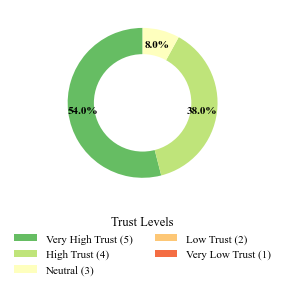

In [27]:
try:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='utf-8-sig')
except UnicodeDecodeError:
    df = pd.read_csv('Human Subject Study (Responses).csv', encoding='gbk')

score_col = 'Decision Tree'
# Clean column names and extract numeric scores
df.columns = df.columns.str.strip()
df['Score_Numeric'] = df[score_col].astype(str).str.extract(r'(\d)').astype(float)

standard_labels = {
    5.0: "Very High Trust (5)",
    4.0: "High Trust (4)",
    3.0: "Neutral (3)",
    2.0: "Low Trust (2)",
    1.0: "Very Low Trust (1)"
}

# Reindex from High to Low for a logical flow
score_counts = df['Score_Numeric'].value_counts().reindex([5.0, 4.0, 3.0, 2.0, 1.0], fill_value=0)
legend_labels = [standard_labels[i] for i in score_counts.index]

fig, ax = plt.subplots(figsize=(3.25, 3.0))

# Sequential color palette: Dark Green to Light to Dark Red/Grey
# Using 'RdYlGn' or 'viridis' is common for trust scales
colors = plt.cm.get_cmap('RdYlGn')(np.linspace(0.8, 0.2, len(score_counts)))

wedges, texts, autotexts = ax.pie(
    score_counts, 
    labels=None, 
    autopct=lambda p: f'{p:.1f}%' if p > 5 else '', # Only show % if slice is big enough
    startangle=90, 
    colors=colors,
    pctdistance=0.80,
    textprops={'fontsize': 8, 'fontweight': 'bold'}
)

# Convert to Donut for a cleaner academic look
centre_circle = plt.Circle((0,0), 0.65, fc='white')
fig.gca().add_artist(centre_circle)

# Place legend below or to the side with no frame
ax.legend(
    wedges, 
    legend_labels, 
    title="Trust Levels", 
    loc="upper center", 
    bbox_to_anchor=(0.5, -0.05),
    frameon=False,
    ncol=2 # Two columns to save vertical space
)

# Use LaTeX caption for title, so we keep the plot area clean
plt.tight_layout()

plt.savefig('trust_score_distribution.pdf', bbox_inches='tight', dpi=600)
# plt.show()